In [40]:
import sys
sys.path.append("../")

from smc.sampler import SMCsampler
from smc.prior import CatalogPrior
from smc.images import ImageAttributes

import torch
# torch.cuda.is_available()
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(device)
torch.set_default_device(device)

import matplotlib.pyplot as plt

In [41]:
num_images = 1
img_dim = 16 # Needs to be square for now
img_width = img_dim
img_height = img_dim
max_objects = 8
psf_stdev = 3.25
background_intensity = 19200

prior = CatalogPrior(max_objects = max_objects,
                     img_height = img_height,
                     img_width = img_width,
                     min_flux = background_intensity/3.)

image_attributes = ImageAttributes(img_height = img_height,
                                   img_width = img_width,
                                   max_objects = max_objects,
                                   psf_stdev = psf_stdev,
                                   background_intensity = background_intensity)

true_counts, true_fluxes, true_locs, true_total_intensities, images = image_attributes.generate(prior, num_images)

In [42]:
for i in range(num_images):
    print(f"image {i+1}",
          "\ncount\n", true_counts[i].round().item(),
          "\ntotal flux\n", true_fluxes[i].sum().item(),
          "\nloc\n", true_locs[i].cpu().numpy(), "\n\n")

image 1 
count
 8 
total flux
 509942.5625 
loc
 [[ 4.4906125  8.281868 ]
 [ 7.3248706 13.516492 ]
 [11.171614   9.063038 ]
 [ 5.390741   6.105352 ]
 [10.153338  11.646929 ]
 [ 1.2775602  8.781459 ]
 [10.772249   1.1388032]
 [11.897369  15.207951 ]] 




True count: 8
True total flux: 509942.5625

Starting the sampler...
iteration 5, temperature = 0.0008874463965184987, posterior mean count = 7.828012466430664
iteration 10, temperature = 0.0026067483704537153, posterior mean count = 7.93489933013916
iteration 15, temperature = 0.005621789023280144, posterior mean count = 7.932117938995361
iteration 20, temperature = 0.010680151171982288, posterior mean count = 7.946472644805908
iteration 25, temperature = 0.019773412495851517, posterior mean count = 7.965195178985596
iteration 30, temperature = 0.03632738068699837, posterior mean count = 7.998680114746094
iteration 35, temperature = 0.06549248844385147, posterior mean count = 8.034578323364258
iteration 40, temperature = 0.11174514144659042, posterior mean count = 8.084256172180176
iteration 45, temperature = 0.17526277899742126, posterior mean count = 8.13147258758545
iteration 50, temperature = 0.2551264762878418, posterior mean count = 8.172910690307617
iteration 55, temperature = 0

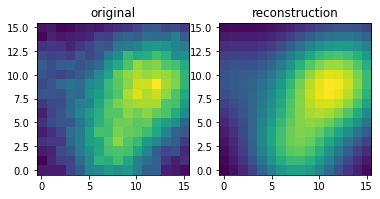

In [43]:
max_objects_smc = max_objects + 2
pad = 0
prior = CatalogPrior(max_objects_smc, img_width, img_height, background_intensity/3., pad)
smc = SMCsampler(images[0], image_attributes, prior,
                 num_blocks = max_objects_smc + 1, catalogs_per_block = 1000,
                 max_smc_iters = 1000)

print(f"True count: {true_counts[0]}")
print(f"True total flux: {true_fluxes[0].sum()}\n")

smc.run(print_progress = True)
smc.summarize()